# Primi test sul dataframe per capire che fare 


In [178]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

In [179]:
from pgmpy.estimators import HillClimbSearch, BicScore, PC, AICScore
from pgmpy.models import BayesianNetwork



In [180]:
dataframe = pd.read_csv('Cardiovascular_risk.csv',index_col=0)
dataframe.shape

(3390, 16)

In [181]:
dataframe

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [182]:
discrete_feat = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
continuous_feat = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [183]:
continuous_data = dataframe[continuous_feat]
discrete_data = dataframe[discrete_feat]

In [184]:
continuous_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
id,,,,,,,
0,64,221.0,148.0,85.0,NaN,90.0,80.0
1,36,212.0,168.0,98.0,29.77,72.0,75.0
2,46,250.0,116.0,71.0,20.35,88.0,94.0
3,50,233.0,158.0,88.0,28.26,68.0,94.0
4,64,241.0,136.5,85.0,26.42,70.0,77.0


In [185]:
from skimpy import skim

skim(discrete_data)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3390   │ │ int64       │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %                ┃ mean     ┃ sd       ┃ p0 ┃ p25 ┃ p50 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ education         │  87 │   2.566371681415929 │    1.971 │    1.019 │  1 │   1 │   2 │   3 │    4 │ █ ▆ ▃▂ │  │
│ │ BPMeds            │  44 │  1.2979351032448379 │  0.02989 │   0.1703 │  0 │   0 │   0 │   0 │    1 │   █    │  │
│ │ prevalentStroke   │   0 │                   0 │  0.00649 │  0.08031 │  0 │   0 │   0 │   0 │    1 │   █    │  │
│ │ prevalentHyp      │   0 │                   0 │   0.3153 │   0.4647 │  0 │   0 │   0 │   1 │    1 │ █    ▄ │  │
│ │ diabetes          │   0 │                   0 │  0.02566 │   0.1582 │  0 │   0 │   0 │   0 │    1 │   █    │  │
│ │ TenYearCHD        │   0 │                   0 │   0.1507 │   0.3578 │  0 │   0 │   0 │   0 │    1 │ █    ▁ │  │
│ └───────────────────┴─────┴─────────────────────┴──────────┴──────────┴────┴─────┴─────┴─────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column      ┃ NA  ┃ NA %  ┃ shortest  ┃ longest  ┃ min ┃ max ┃ chars per row ┃ words per row ┃ total words ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ sex         │   0 │     0 │ F         │ F        │ F   │ M   │             1 │             1 │        3390 │  │
│ │ is_smoking  │   0 │     0 │ NO        │ YES      │ NO  │ YES │           2.5 │             1 │        3390 │  │
│ └─────────────┴─────┴───────┴───────────┴──────────┴─────┴─────┴───────────────┴───────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [186]:
skim(continuous_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3390   │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 7      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA   ┃ NA %                  ┃ mean  ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ age        │    0 │                     0 │ 49.54 │ 8.593 │    32 │    42 │    49 │    56 │    70 │ ▃█▇▇▅▂ │  │
│ │ totChol    │   38 │      1.12094395280236 │ 237.1 │ 45.25 │   107 │   206 │   234 │   264 │   696 │  ▃█▁   │  │
│ │ sysBP      │    0 │                     0 │ 132.6 │ 22.29 │  83.5 │   117 │ 128.5 │   144 │   295 │  ▄█▂   │  │
│ │ diaBP      │    0 │                     0 │ 82.88 │ 12.02 │    48 │  74.5 │    82 │    90 │ 142.5 │  ▁▆█▂  │  │
│ │ BMI        │   14 │   0.41297935103244837 │ 25.79 │ 4.115 │ 15.96 │ 23.02 │ 25.38 │ 28.04 │  56.8 │  ▃█▂   │  │
│ │ heartRate  │    1 │  0.029498525073746312 │ 75.98 │ 11.97 │    45 │    68 │    75 │    83 │   143 │  ▂█▅▁  │  │
│ │ glucose    │  304 │      8.96755162241888 │ 82.09 │ 24.24 │    40 │    71 │    78 │    87 │   394 │   █▁   │  │
│ └────────────┴──────┴───────────────────────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

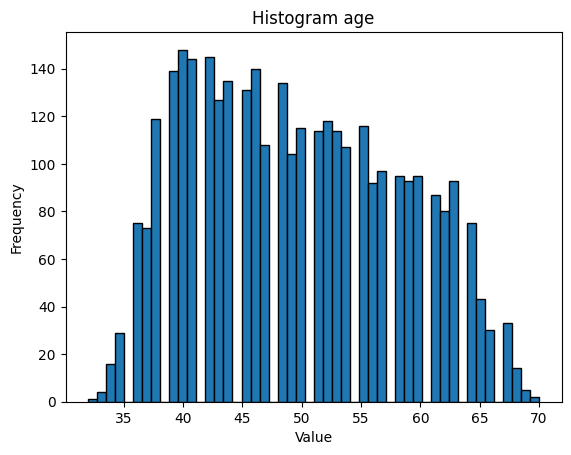

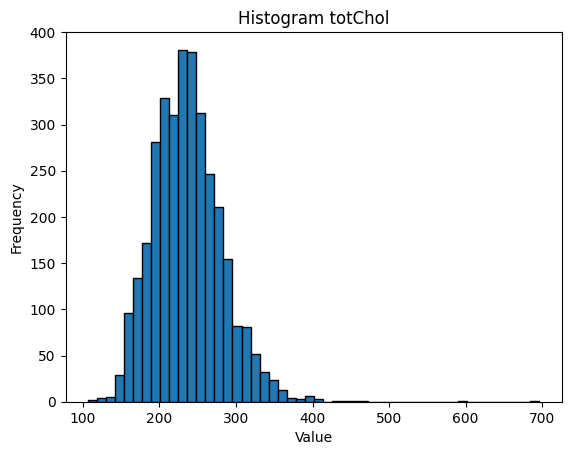

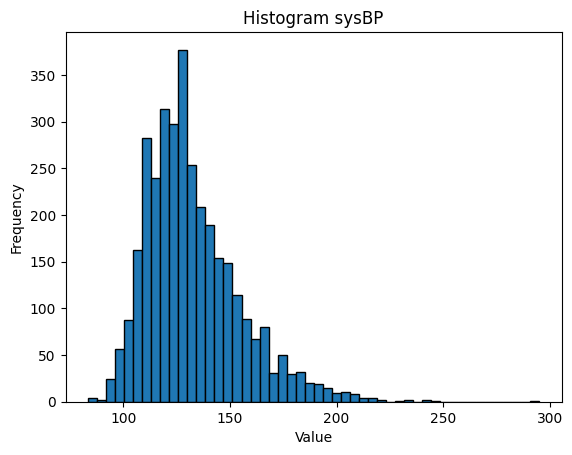

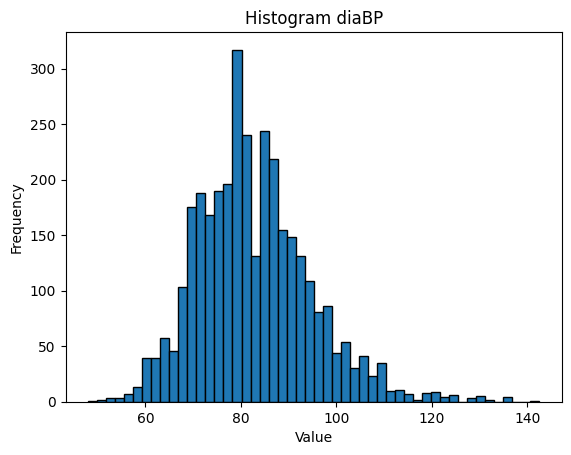

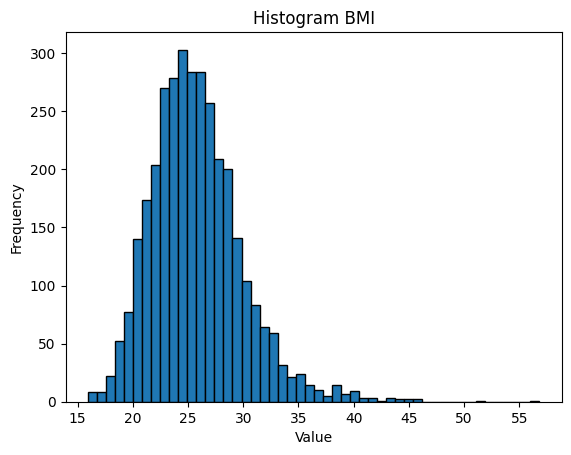

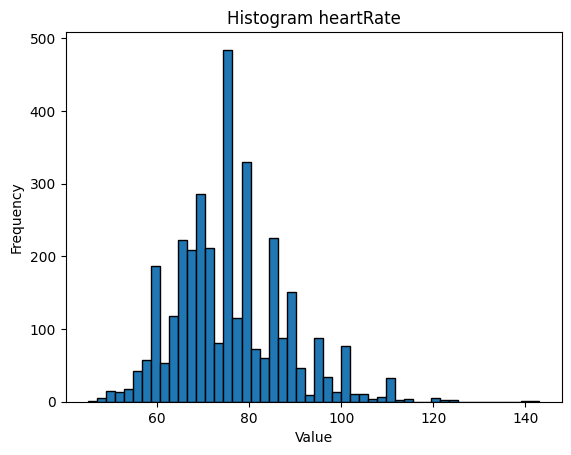

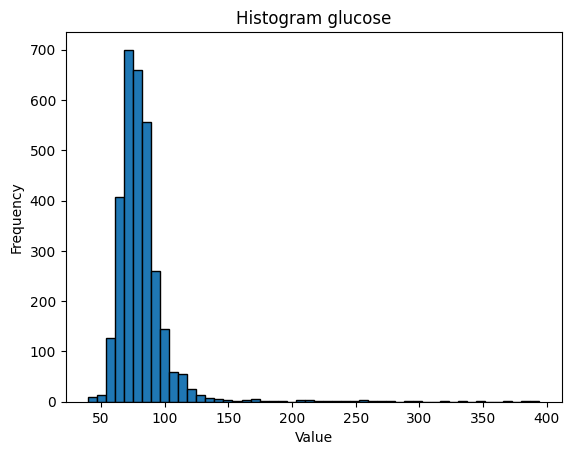

In [187]:
import matplotlib.pyplot as plt

for feature in continuous_feat:
    data = continuous_data[feature]
    # Plotting the histogram
    plt.figure()
    plt.hist(data, bins=50, edgecolor='black')  # You can adjust the number of bins
    plt.title(f'Histogram {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

In [188]:
continuous_data_cl = continuous_data.dropna()

In [189]:
import pandas as pd
discr_labels_5 = ['0','1','2','3','4']
discr_labels_4 = ['0','1','2','3']
continuous_data_cl.loc[:,'age'] = pd.cut(continuous_data_cl.age,bins=[20,39,49,59,69,500],labels=discr_labels_5,ordered=False).astype(float)
continuous_data_cl.loc[:,'totChol'] = pd.cut(continuous_data_cl.totChol,bins=[0,159,199,239,279,500],labels=discr_labels_5,ordered=False).astype(float)
continuous_data_cl.loc[:,'sysBP'] = pd.cut(continuous_data_cl.sysBP,bins=[0,119,129,139,159,500],labels=discr_labels_5,ordered=False).astype(float)
continuous_data_cl.loc[:,'diaBP'] = pd.cut(continuous_data_cl.diaBP,bins=[0,79,89,119,float('inf')],labels = discr_labels_4,ordered=False).astype(float)
continuous_data_cl.loc[:,'BMI'] = pd.cut(continuous_data_cl.BMI,bins=[0,18.5,24.9,29.9,34.9,float('inf')],labels=discr_labels_5,ordered=False).astype(float)
continuous_data_cl.loc[:,'heartRate'] = pd.cut(continuous_data_cl.heartRate,bins=[0,59,99,float('inf')],labels = [0,1,2],ordered=False).astype(float)
continuous_data_cl.loc[:,'glucose'] = pd.cut(continuous_data_cl.glucose,bins=[0,69,99,125,float('inf')],labels=discr_labels_4,ordered=False).astype(float)

continuous_data_cl = continuous_data_cl.astype('str')

In [190]:
discrete_data.columns 

Index(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD'],
      dtype='object')

In [191]:
continuous_data_cl.columns

Index(['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'], dtype='object')

In [192]:
continuous_data_cl.columns=['A','C','SBP','DBP','BMI','HR','G']
discrete_data.columns = ['E','S','SM','M','PS','PH','D','TYS']

dataset = pd.concat([continuous_data_cl,discrete_data],axis=1)

encoder = LabelEncoder()

for col in dataset.columns :
    dataset[col] = encoder.fit_transform(dataset[col])
dataset.head()

,A,C,SBP,DBP,BMI,HR,G,E,S,SM,M,PS,PH,D,TYS
id,,,,,,,,,,,,,,,
1,0,2,4,2,2,1,1,3,1,0,0,0,1,0,0
2,1,3,0,0,1,1,1,0,0,1,0,0,0,0,0
3,2,2,3,1,2,1,1,0,1,1,0,0,1,0,1
4,3,3,2,1,2,1,1,0,0,1,0,0,0,0,0
5,3,3,4,3,3,1,0,2,0,0,0,0,1,0,1


In [198]:
from pgmpy.estimators.CITests import chi_square

print(chi_square(X='SM', Y='G', Z=[], data=dataset, significance_level=0.05)) 

False


In [194]:
fixed_edges = [('A','D'),('G','D')]
forbidden_edges= [(var,"A") for var in dataset.columns if var != "A"] + \
                  [(var,"G") for var in dataset.columns if var != "G"] 

In [195]:
hill = HillClimbSearch(continuous_data_cl)
best_model = hill.estimate(scoring_method=AICScore(continuous_data_cl),black_list=forbidden_edges)
nodes = best_model.nodes()
edges = best_model.edges()

print(edges)


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('A', 'SBP'), ('A', 'C'), ('SBP', 'DBP'), ('SBP', 'HR'), ('DBP', 'BMI')]


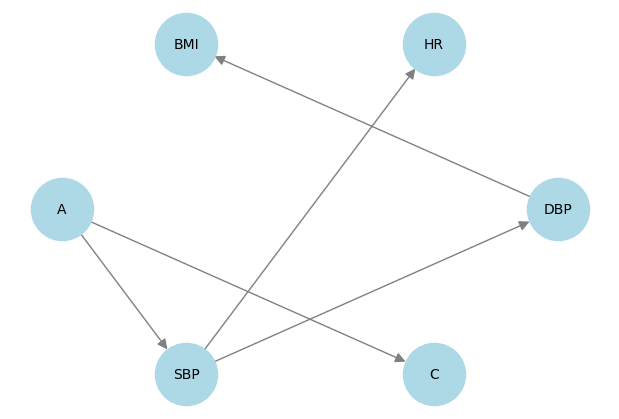

In [196]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a pgmpy model
model = BayesianNetwork(edges)

# Convert to a networkx graph
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Draw the graph
plt.figure(figsize=(6, 4))
pos = nx.shell_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10, arrowsize=15)

plt.show()